# Evolutionary Algorithm

## Genetic Algorithm Multi-Objective Optimization

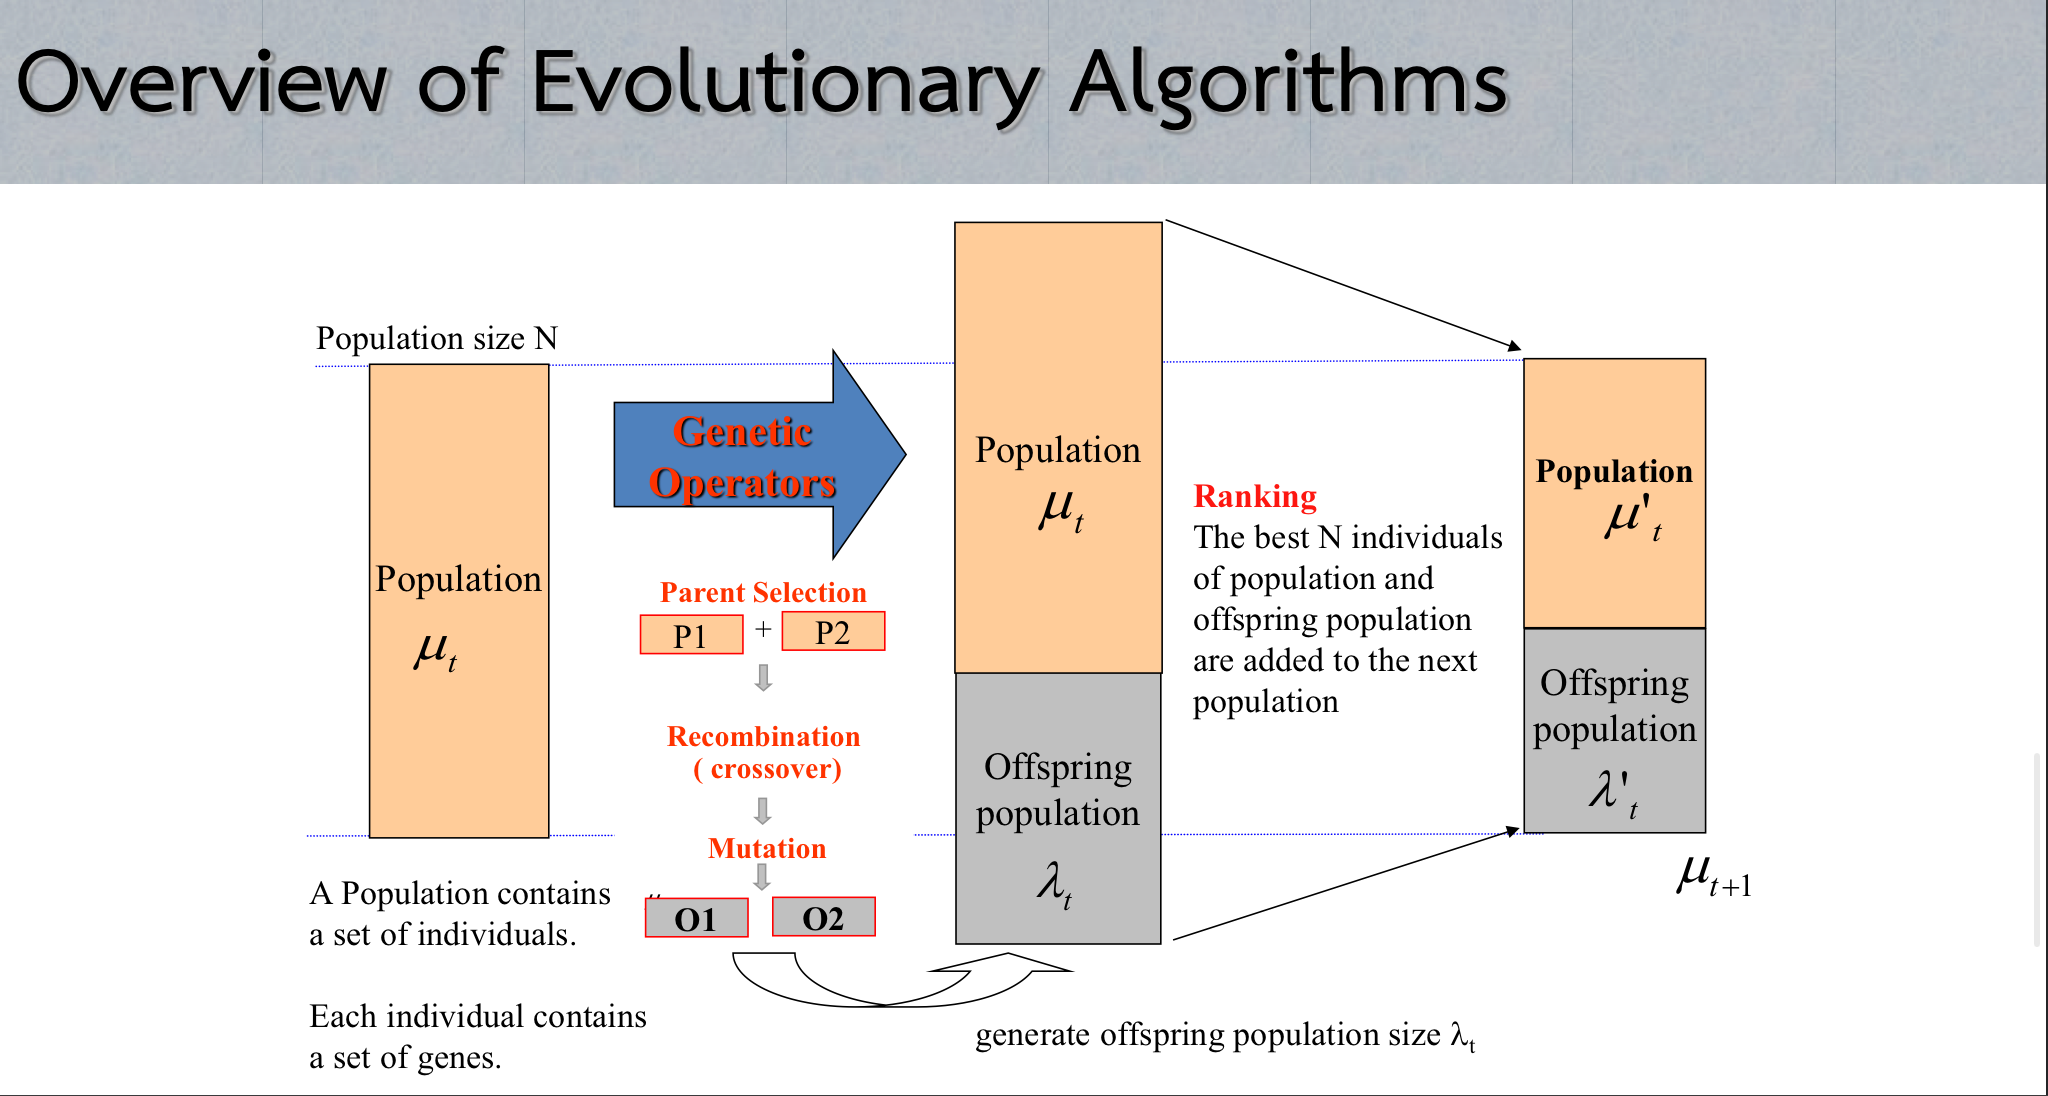

### **NSGA-II (Nondominated Sortingin Genetic Algorithm 2)**

 Using the DEAP library to implement NSGA-II

In [1]:
!pip install deap # Install DEAP Library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.2 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# Define the problem as a multi-objective minimization
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Minimize both objectives
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Initialize DEAP toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the multi-objective function
def evaluate(individual):
    x, y = individual
    f1 = x**2 + y**2  # First objective (minimize)
    f2 = (x - 1)**2 + (y + 1)**2  # Second objective (minimize)
    return f1, f2

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=-10, up=10, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=-10, up=10, eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate)

# Run Genetic Algorithm
def main():
    pop_size = 100
    generations = 50
    population = toolbox.population(n=pop_size)
    hof = tools.ParetoFront()

    # Apply NSGA-II
    algorithms.eaMuPlusLambda(population, toolbox, mu=pop_size, lambda_=pop_size*2,
                              cxpb=0.7, mutpb=0.2, ngen=generations,
                              stats=None, halloffame=hof, verbose=True)

    return population, hof

if __name__ == "__main__":
    population, hof = main()

    # Print Pareto-optimal solutions
    for ind in hof:
        print(ind, ind.fitness.values)
